# Introduction

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform
import pickle
import xgboost as xgb

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.18.5
pandas version :  1.1.3
seaborn version :  0.11.0


# Load and Describe Data

## Load Data

In [2]:
data = pd.read_csv("startup data.csv")
print('There are', str(len(data)), 'rows of data in this dataset')
print('There are', str(data.shape[1]), 'features in this dataset')
data.head(5)

There are 923 rows of data in this dataset
There are 49 features in this dataset


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
data['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [4]:
print('1. The percentage of successed startup are ' + str(round((597/923)*100,2)) + '%')
print('2. The percentage of failed startup are ' + str(round((326/923)*100,2)) + '%')

1. The percentage of successed startup are 64.68%
2. The percentage of failed startup are 35.32%


## Describe Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

**Conclusion**</br>
* Dataframe have 49 columns
* Dataframe have 923 rows
* Total categorical columns are 14 columns
* Total numerical columns are 35 columns
* There are 5 columns that have a missing value (`unnamed: 6`,`closed_at`, `age_first_milestone_year  `, `age_last_milestone_year`, and `state_code.1`)
* `labels` column is the target for this dataset

# Data Understanding: Exploratory Data Analysis (EDA)

## Statistical Summary

### Separation of Categorical and Numerical Data 

In [6]:
# assign the categorical data into cats object
cats = ['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 
        'name', 'founded_at', 'closed_at', 'first_funding_at', 
        'last_funding_at','state_code.1', 'category_code', 'object_id', 
        'status']

# assign the numerical data into nums object
nums = ['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 
        'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 
        'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 
        'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 
        'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 
        'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 
        'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

#without one hot encoding features
wo_onehot = ['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 
             'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 
             'relationships', 'funding_rounds', 'funding_total_usd', 'milestones',
             'avg_participants', 'is_top500' ]

### Statistical Numerical Data

In [7]:
data[wo_onehot].describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000,1.000000


* `Unnamed: 0`, `labels`, `age_first_funding_year`, `age_last_funding_year`, `age_first_milestone_year`, `relationships`, `age_last_milestone_year`, `funding_total_usd` (probably has outliers)

* `latitude` and `longitude` is a geospatial location

* `funding_rounds`, `milestones`, `avg_participants`, `is_top500` probably normal distribution

### Statistical Categorical Data

In [8]:
data[cats].describe()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
count,923,923,923,923,430,923,923,335,923,923,922,923,923,923
unique,35,382,922,221,252,922,217,202,585,680,35,35,922,2
top,CA,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,1/1/2003,6/1/2013,1/1/2008,1/1/2008,CA,software,c:28482,acquired
freq,488,30,2,128,12,2,55,25,18,11,487,153,2,597


* `state_code` and `state_code.1` has exactly same values to each other with **35** unique values with majority is CA.
* `zip_code` has been covered up by `city` with data majority in `zip_code` is 94107 and **382** unique value.
* `id` and `object_id` has exactly the same values to each other with **922** unique values.
* `Unnamed: 6` has been covered up by `city` with data majority is San Fransisco.
* `name` has **922** unique values with Redwood Systems as majority.
* `founded_at` has **217** unique values with 1/1/2003 as data majority.
* `closed_at` has **202** unique values with 6/2/2013 as data majority.
* `first_funding_at` has **585** unique values with 1/1/2008 as data majority.
* `last_funding_at` has **680** unique values with 1/1/2008 as data majority.
* `category_code` has **35** unique values with software as data majority.
* `status` has **2** unique values with acquired as data majority.

## Check Missing Values

In [9]:
# assign features with missing value into data_missing object
data_missing = data.isnull().sum().reset_index()
data_missing.columns = ['feature','missing_value']
data_missing = data_missing[data_missing['missing_value'] > 0].reset_index(drop=True)
data_missing['percentage'] = (data_missing['missing_value']/len(data))*100
data_missing

,feature,missing_value,percentage
0,Unnamed: 6,493,53.412784
1,closed_at,588,63.705309
2,age_first_milestone_year,152,16.468039
3,age_last_milestone_year,152,16.468039
4,state_code.1,1,0.108342


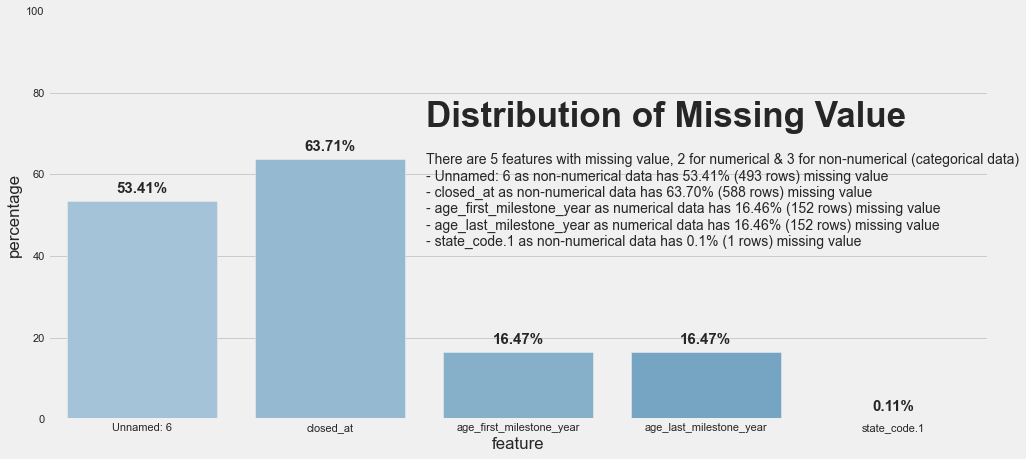

In [10]:
fig, ax = plt.subplots(figsize = (15,7))

mvalue_plot = sns.barplot(x='feature', y='percentage', data=data_missing,
           palette = sns.color_palette('Blues_d', n_colors = 13, desat = 1))

ax.set_ylim(0,100)

for p in mvalue_plot.patches:
    height = p.get_height()
    mvalue_plot.text(x = p.get_x() + (p.get_width()/2),
                y = height + 2,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center', fontsize = 15, fontweight='bold')

title = '''Distribution of Missing Value'''
fig.text(x=0.43, y=0.65, s = title, fontsize = 35, weight = 'bold')

text = '''
There are 5 features with missing value, 2 for numerical & 3 for non-numerical (categorical data)
- Unnamed: 6 as non-numerical data has 53.41% (493 rows) missing value
- closed_at as non-numerical data has 63.70% (588 rows) missing value
- age_first_milestone_year as numerical data has 16.46% (152 rows) missing value
- age_last_milestone_year as numerical data has 16.46% (152 rows) missing value
- state_code.1 as non-numerical data has 0.1% (1 rows) missing value

'''
fig.text(x=0.43, y=0.35, s = text, fontsize=14);

#plt.savefig('fig/Distribution of Missing Value.png', tight_box=True)

## Check Duplicated Data

In [11]:
data.duplicated().sum()

0

**In the raw data, there are no duplicate values**

## Drop Columns

In [12]:
data_clean = data.drop(['Unnamed: 0', 'Unnamed: 6', 'id', 'object_id', 'latitude', 'longitude',
                       'zip_code', 'state_code.1', 'status'], axis=1)

In [13]:
# assign features with missing value into data_missing1 object
data_missing1 = data_clean.isnull().sum().reset_index()
data_missing1.columns = ['feature','missing_value']
data_missing1 = data_missing1[data_missing1['missing_value'] > 0].reset_index(drop=True)
data_missing1['percentage'] = (data_missing1['missing_value']/len(data))*100
data_missing1

,feature,missing_value,percentage
0,closed_at,588,63.705309
1,age_first_milestone_year,152,16.468039
2,age_last_milestone_year,152,16.468039


In [14]:
# change column to date type
data_clean.founded_at=pd.to_datetime(data_clean.founded_at)
data_clean.closed_at=pd.to_datetime(data_clean.closed_at)
data_clean.first_funding_at=pd.to_datetime(data_clean.first_funding_at)
data_clean.last_funding_at=pd.to_datetime(data_clean.last_funding_at)

data_clean.head(3)

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,CA,San Diego,Bandsintown,1,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,...,0,1,0,1,0,0,0,0,1.00,0
1,CA,Los Gatos,TriCipher,1,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,...,0,0,1,0,0,1,1,1,4.75,1
2,CA,San Diego,Plixi,1,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,...,0,0,0,0,1,0,0,0,4.00,1


In [15]:
# fill missing value in closed_at with closed_at + 1 day so we know that the startup haven't been failed yet
from datetime import timedelta
data_clean['closed_at'] = data_clean['closed_at'].fillna(data_clean['closed_at'].max() + timedelta(days=1))

In [16]:
# Assign startup age in days to age column
data_clean['age'] = data_clean['closed_at'] - data_clean['founded_at']
# age from success startup
data_clean['age'].max()

Timedelta('10368 days 00:00:00')

In [20]:
# we must get the absolute value of this four columns
data_clean["age_first_funding_year"]=np.abs(data_clean["age_first_funding_year"])
data_clean["age_last_funding_year"]=np.abs(data_clean["age_last_funding_year"])
data_clean["age_first_milestone_year"]=np.abs(data_clean["age_first_milestone_year"])
data_clean["age_last_milestone_year"]=np.abs(data_clean["age_last_milestone_year"])

In [21]:
data_clean.head()

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age
0,CA,San Diego,Bandsintown,1,2007-01-01,2013-10-31,2009-04-01,2010-01-01,2.2493,3.0027,...,1,0,1,0,0,0,0,1.0000,0,2495 days
1,CA,Los Gatos,TriCipher,1,2000-01-01,2013-10-31,2005-02-14,2009-12-28,5.1260,9.9973,...,0,1,0,0,1,1,1,4.7500,1,5052 days
2,CA,San Diego,Plixi,1,2009-03-18,2013-10-31,2010-03-30,2010-03-30,1.0329,1.0329,...,0,0,0,1,0,0,0,4.0000,1,1688 days
3,CA,Cupertino,Solidcore Systems,1,2002-01-01,2013-10-31,2005-02-17,2007-04-25,3.1315,5.3151,...,0,0,0,0,1,1,1,3.3333,1,4321 days
4,CA,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,...,0,1,1,0,0,0,0,1.0000,1,792 days


In [23]:
# for columns with missing value i will fill it by median() function
data_clean["age_first_milestone_year"].fillna((data_clean["age_first_milestone_year"].median()), inplace=True)
data_clean["age_last_milestone_year"].fillna((data_clean["age_last_milestone_year"].median()), inplace=True)

In [25]:
data_clean.isnull().sum()

state_code                  0
city                        0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel 

**There is no columns with missing value anymore, so we decided to proceed further**